In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt

import PV_ICE

cwd = os.getcwd() #grabs current working directory

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'EnergyAnalysis')
inputfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')
altBaselinesfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'Energy_CellModuleTechCompare')

if not os.path.exists(testfolder):
    os.makedirs(testfolder)

In [2]:
print(cwd)

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\publications


In [3]:
#print("Working on a ", platform.system(), platform.release())
print("Python version ", sys.version)
print("Pandas version ", pd.__version__)
print("pyplot ", plt.matplotlib.__version__)
print("PV_ICE version ", PV_ICE.__version__)

Python version  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Pandas version  2.0.3
pyplot  3.7.2
PV_ICE version  


In [4]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

This journal pulls out the silver demand projections for the 3 projected technologies, PERC, TOPCon, SHJ, as projected for the Energy Analysis paper (10a). We also do a literature comparison, since this is a highly studied space.

We pull in the output dataframes from journal 10a and do graphing here.

In [5]:
cc_13scen_yearly_dataOut_linear = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','Deploy_MirletzLinear','cc_13scen_yearly.csv'),
           index_col = 0)
cc_13scen_yearly_dataOut_sigmoid = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','Deploy_MirletzLinear','cc_13scen_yearly.csv'),
           index_col = 0)
cc_13scen_yearly_dataOut_expotoflat = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','Deploy_MirletzLinear','cc_13scen_yearly.csv'),
           index_col = 0)

cc_13scen_yearly_dataIn_PERCag = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','input',
            'r_PERC_silver_matdataIn_m_EnergyAnalysis_withreplacements.csv'), skiprows=[1], index_col = 'year')
cc_13scen_yearly_dataIn_TOPConag = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','input',
            'r_TOPCon_silver_matdataIn_m_EnergyAnalysis_withreplacements.csv'), skiprows=[1], index_col = 'year')
cc_13scen_yearly_dataIn_SHJag = pd.read_csv(os.path.join(inputfolder, 'EnergyAnalysis','input',
            'r_SHJ_silver_matdataIn_m_EnergyAnalysis_withreplacements.csv'), skiprows=[1], index_col = 'year')

In [6]:
celltech_modeff = pd.read_csv(os.path.join(supportMatfolder, 'output-celltech-modeffimprovements.csv'),index_col=0) #pull in module eff
celltech_aguse = pd.read_csv(os.path.join(supportMatfolder, 'output-celltech-Agusageimprovements.csv'),index_col=0) #pull in Ag use
#sim1.scenario['r_PERC'].modifyMaterials('silver', 'mat_massperm2', celltech_aguse.loc[2022:,'PERC'], start_year=2022)

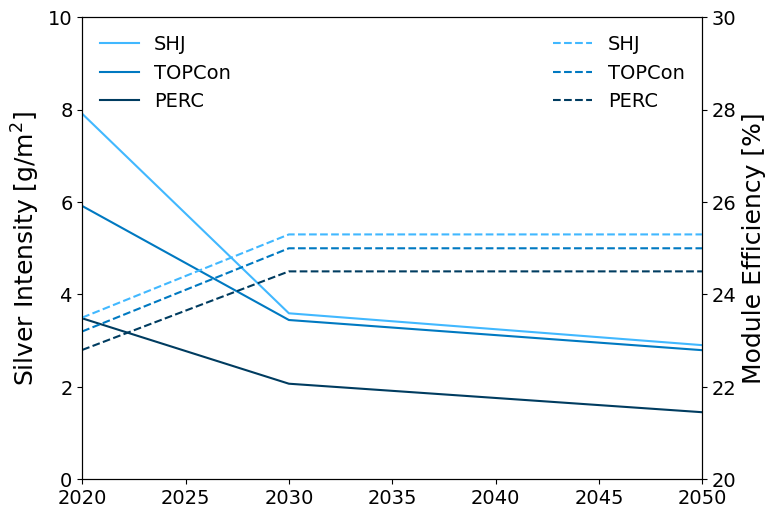

In [7]:

fig, ax1 = plt.subplots(figsize=(8,6))

#silver content
ax1.plot(celltech_aguse['SHJ'], color='#41B8FF', label='SHJ')
ax1.plot(celltech_aguse['TOPCon'], color='#0079C1', label='TOPCon')
ax1.plot(celltech_aguse['PERC'], color='#003C60', label='PERC')

#sanity check that the input files agree with what I thought I input
#ax1.plot(cc_13scen_yearly_dataIn_PERCag.loc[2020:2050,'mat_massperm2'], color='#005B91')
#ax1.plot(cc_13scen_yearly_dataIn_TOPConag.loc[2020:2050,'mat_massperm2'], color='#0079C1')
#ax1.plot(cc_13scen_yearly_dataIn_SHJag.loc[2020:2050,'mat_massperm2'], color='#41B8FF')

ax1.set_ylabel('Silver Intensity [g/m$^2$]', fontsize=18)
ax1.set_ylim(0,10)
ax1.set_xlim(2020,2050)
#ax1.text(2051,70,'75 TW', color='#954712', fontsize=16)
#ax1.text(2088,80,'86 TW', color='#954712', fontsize=16)

ax2 = ax1.twinx()

#module efficiency
ax2.plot(celltech_modeff['SHJ'],ls='--', color='#41B8FF', label='SHJ')
ax2.plot(celltech_modeff['TOPCon'],ls='--', color='#0079C1', label='TOPCon')
ax2.plot(celltech_modeff['PERC'], ls='--', color='#003C60', label='PERC')


ax2.set_ylabel('Module Efficiency [%]', fontsize=18)
ax2.set_ylim(20.0,30.0)
#ax2.axvspan(2000,2022, facecolor='0.2', alpha=0.1) #grey shading
#ax2.text(2002,0.5,'Global\nHistorical\nDeployment', fontsize=14)
#ax2.text(2060,0.3,'+ Replacements', fontsize=16)

#ax2.set_zorder(10) #send orange to back
#ax2.patch.set_visible(False) #send orange to back

ax1.legend(frameon=False, loc='upper left')
ax2.legend(frameon=False, loc='upper right')

plt.show()

#fig.savefig('energyresults-deployment.png', dpi=300, bbox_inches='tight')

In [8]:
silver_annual_demand = cc_13scen_yearly_dataOut_linear.filter(like='VirginStock_silver') #tonnes
silver_annual_demand_pvice = silver_annual_demand.filter(like='PV_ICE')
silver_annual_demand_perc = silver_annual_demand.filter(like='r_PERC')
silver_annual_demand_topcon = silver_annual_demand.filter(like='r_TOPCon')
silver_annual_demand_shj = silver_annual_demand.filter(like='r_SHJ')


In [9]:
silver_annual_demand_topcon.loc[2050]

VirginStock_silver_sim1_r_TOPCon_[Tonnes]    58915.097213
Name: 2050, dtype: float64

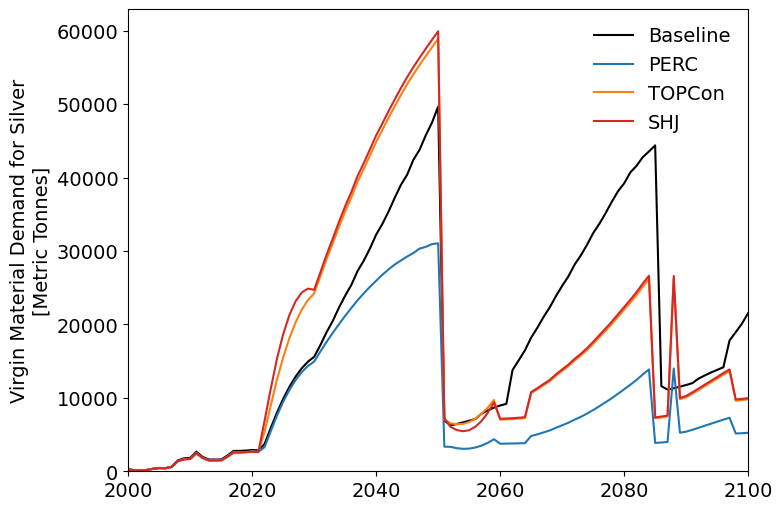

In [10]:
plt.plot(silver_annual_demand_pvice, color='black', label='Baseline')
plt.plot(silver_annual_demand_perc, color = 'tab:blue', label='PERC')
plt.plot(silver_annual_demand_topcon, color='tab:orange', label='TOPCon')
plt.plot(silver_annual_demand_shj, color='tab:red', label='SHJ')
plt.ylim(0,)
plt.xlim(2000,2100)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.legend(frameon=False)

plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='tab:red', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='tab:orange', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='tab:blue', label='PERC')
plt.ylim(0,)
plt.xlim(2000,2050)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.legend(frameon=False)
plt.title('Silver Demand by Technology to Achieve 75 TW')

## Add in Historical Silver Demand and Other Literature projections for Comparison

In [11]:
ag_WSS = pd.read_csv(os.path.join(supportMatfolder, 'WorldSilverSurvey-AgProduction-PVuse.csv'), index_col=0)
ag_WSS.head()

,PV Silver Demand [million oz],PV Silver Demand [metric tonnes],Silver Production [million ounces],Silver Production [metric tonnes],Total Supply [million troy ounces,Total Supply [metric tonnes],Global Reserves (exclude production) [ metric tonnes],Global Resources excluding reserves [metric tonnes],Global ReserveBase_USGS [tonnes]
Year,,,,,,,,,
2004,NaN,NaN,613.6,19084.94293,872.0,27122.01798,NaN,NaN,570000.0
2005,NaN,NaN,639.7,19896.73727,954.1,29675.59329,NaN,NaN,570000.0
2006,NaN,NaN,642.7,19990.04697,915.6,28478.11888,NaN,NaN,570000.0
2007,NaN,NaN,666.1,20717.86259,887.3,27597.89742,NaN,NaN,570000.0
2008,NaN,NaN,713.8,22201.48673,905.7,28170.19688,NaN,NaN,570000.0


In [12]:
ag_WSS_flatforward = ag_WSS.interpolate()

In [13]:
ag_WSS_flatforward.loc[2023,'Total Supply [metric tonnes]']

31877.70209

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_24936\2258399487.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


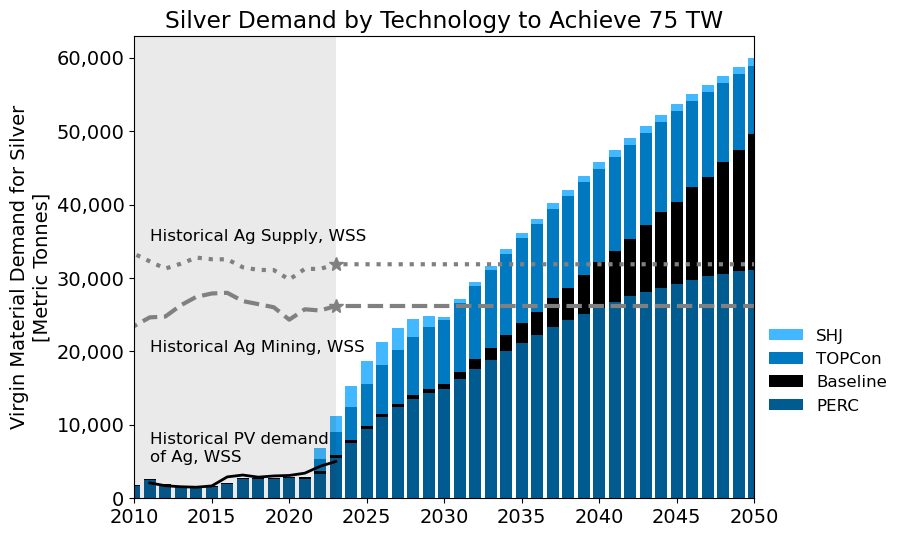

In [109]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

fig, ax = plt.subplots()

ax.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='#41B8FF', label='SHJ')
ax.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='#0079C1', label='TOPCon')
ax.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
ax.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='#005B91', label='PERC')

ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'],
         lw=3, ls=':', color='gray')#, label='Total Supply, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'],
         lw=3, ls='--', color='gray')#, label='Mining production, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')

ax.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'], lw=2, color='black')#, label='Historical PV Silver Demand, WSS')

ax.axvspan(2009,2023, facecolor='0.2', alpha=0.1) #grey shading
#ax.text(2051,1,'Wang 2023, ? TW', fontsize=12)
#ax.text(2051,60000,'Hallam 2022, 63.4 TW', fontsize=12)
#ax.text(2051,140000,'Gervais 2021, 70 TW of PERC', fontsize=12)
ax.text(2011,35000,'Historical Ag Supply, WSS', fontsize=12)
ax.text(2011,20000,'Historical Ag Mining, WSS', fontsize=12)
ax.text(2011,5000,'Historical PV demand\nof Ag, WSS', fontsize=12)

#plt.grid(axis='y', color='0.9', ls='--', zorder=0)
#plt.set_axisbelow(True)
ax.legend(fontsize=12, bbox_to_anchor=(1,.4), frameon=False)

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
      
ax.set_ylim(0,)
ax.set_xlim(2010,2050)
ax.set_ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve 75 TW')
plt.show()

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_24936\3707715803.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


Text(0.5, 1.0, 'Silver Demand by Technology to Achieve 75 TW')

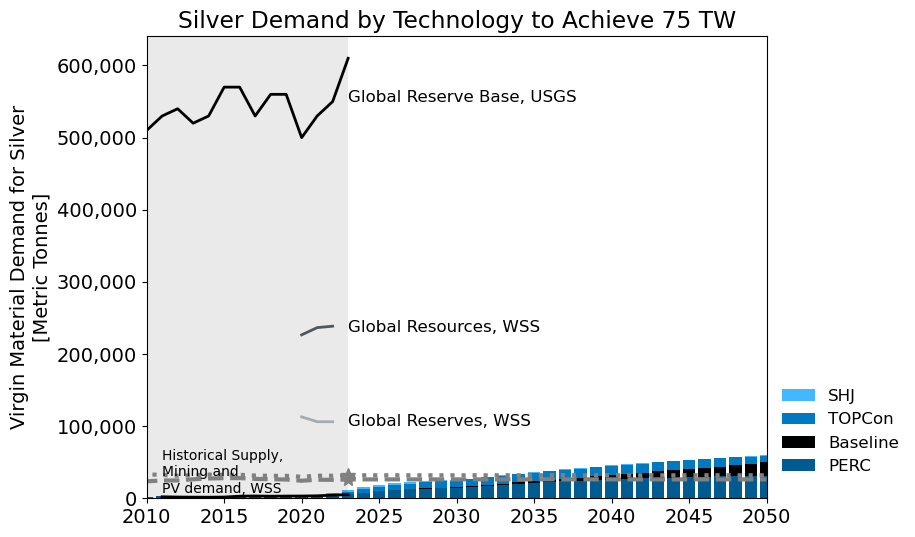

In [113]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)
fig, ax = plt.subplots()

ax.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='#41B8FF', label='SHJ')
ax.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='#0079C1', label='TOPCon')
ax.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
ax.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='#005B91', label='PERC')

ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'],
         lw=3, ls=':', color='gray')#, label='Total Supply, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'],
         lw=3, ls='--', color='gray')#, label='Mining production, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')

ax.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'], lw=2, color='black')#, label='Historical PV Silver Demand, WSS')

ax.plot(ag_WSS.index, ag_WSS['Global ReserveBase_USGS [tonnes]'],lw=2, color='black')#, label='Global Reserve Base, USGS')
ax.plot(ag_WSS.index, ag_WSS['Global Resources excluding reserves [metric tonnes]'],lw=2, color='#50565C')#, label='Global Resources, WSS')
ax.plot(ag_WSS.index, ag_WSS['Global Reserves (exclude production) [ metric tonnes]'],lw=2, color='#A4ABB1')#, label='Global Reserves, WSS')

ax.axvspan(2009,2023, facecolor='0.2', alpha=0.1) #grey shading

ax.text(2023,550000,'Global Reserve Base, USGS', fontsize=12)
ax.text(2023,230000,'Global Resources, WSS', fontsize=12)
ax.text(2023,100000,'Global Reserves, WSS', fontsize=12)
ax.text(2011,8000,'Historical Supply,\nMining and\nPV demand, WSS', fontsize=10)

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
ax.legend(fontsize=12, bbox_to_anchor=(1,0.02), frameon=False)
ax.set_ylim(0,)
ax.set_xlim(2010,2050)
ax.set_ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve 75 TW')

### Read in literature comparisons

In [16]:
#read in literature compare 
ag_lit_compare = pd.read_csv(os.path.join(supportMatfolder, 'Ag_Literature_Compare.csv'), index_col=0)
ag_lit_compare_ffill = ag_lit_compare.interpolate()

In [17]:
#read in and manipulate data from Wang et al 2023 from https://zenodo.org/records/7023703
wang2023_Agdemand = pd.read_csv(os.path.join(supportMatfolder,'Literature_AgDemand_Wang2023_AIMCGE2_SSP1-19.csv'), 
           usecols=['Year','Total Demand','MC_iteration'])

In [18]:
wang2023_Agdemand_allMC = wang2023_Agdemand.pivot(index='Year', columns='MC_iteration', values='Total Demand')
#wang2023_Agdemand_allMC
#well, apparently all the monte carlos for this gave the same answer

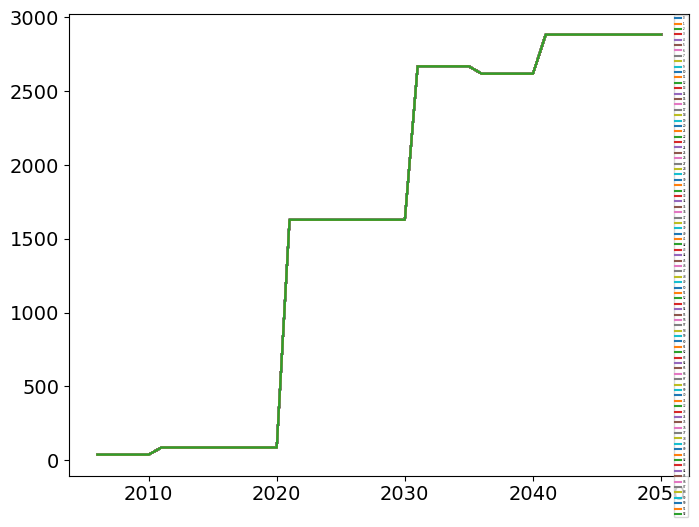

In [19]:
#well, apparently all the monte carlos for this gave the same answer
plt.plot(wang2023_Agdemand_allMC, label=wang2023_Agdemand_allMC.columns)
plt.legend(fontsize=2)

#they assume 10 tons/GW from Manberger + Stenqvist 2018 - this is definitely too low for historical demand

In [20]:
ag_lit_compare_ffill.columns

Index(['Hallam 2022_LearningRate10%_Industry [tonnes]',
       'Hallam 2022_LearningRate10%_Ntype [tonnes]',
       'Wang 2023_1.5C_min [tonnes]', 'Wang 2023_1.5C_median [tonnes]',
       'Wang 2023_1.5C_max [tonnes]', 'Wang 2023_2C_min [tonnes]',
       'Wang 2023_2C_median [tonnes]', 'Wang 2023_2C_max [tonnes]',
       'Gervais 2021_ScenarioA [tonnes]',
       'Gervais 2021_IEA8TW_PERCmoderate [tonnes]',
       'Gervais 2021_70TW_PERCmoderate [tonnes]',
       'Gervais 2021_70TW_PERCinnovative [tonnes]'],
      dtype='object')

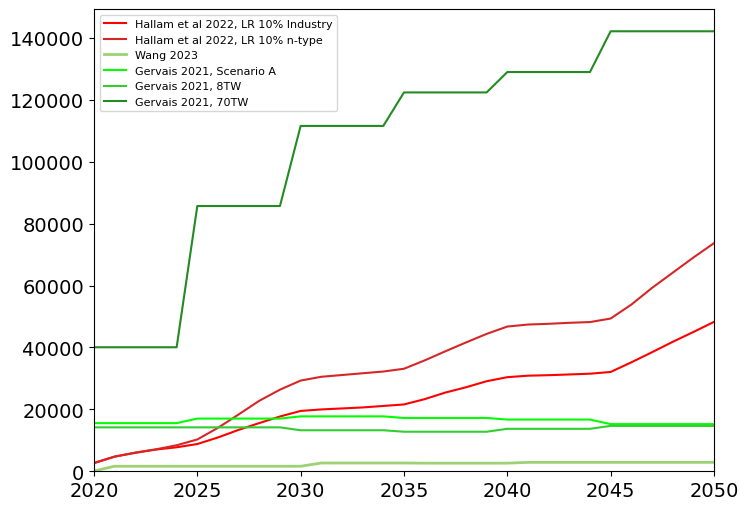

In [26]:
plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Industry [tonnes]'], color='red', label='Hallam et al 2022, LR 10% Industry')
plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Ntype [tonnes]'], color='tab:red', label='Hallam et al 2022, LR 10% n-type')

plt.plot(wang2023_Agdemand_allMC[0], color='#9CD174', lw=2, label='Wang 2023')

#plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_min [tonnes]'], color='mediumpurple', label='')
#plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_median [tonnes]'], color='rebeccapurple', label='Wang et al 2023, 1.5C median')
#plt.plot(ag_lit_compare_ffill['Wang 2023_1.5C_max [tonnes]'], color='mediumorchid', label='')
#plt.plot(ag_lit_compare_ffill['Wang 2023_2C_min [tonnes]'], color='aqua', label='')
#plt.plot(ag_lit_compare_ffill['Wang 2023_2C_median [tonnes]'], color='deepskyblue', label='Wang et al 2023, 2C median')
#plt.plot(ag_lit_compare_ffill['Wang 2023_2C_max [tonnes]'], color='royalblue', label='')

plt.plot(ag_lit_compare_ffill['Gervais 2021_ScenarioA [tonnes]'], color='lime', label='Gervais 2021, Scenario A ')
plt.plot(ag_lit_compare_ffill['Gervais 2021_IEA8TW_PERCmoderate [tonnes]'], color='limegreen', label='Gervais 2021, 8TW')
plt.plot(ag_lit_compare_ffill['Gervais 2021_70TW_PERCmoderate [tonnes]'], color='forestgreen', label='Gervais 2021, 70TW')


plt.ylim(0,)
plt.xlim(2020, 2050)
plt.legend(loc='upper left', fontsize = 8)

Text(0.5, 1.0, 'Silver Demand by Technology to Achieve up to 75 TW')

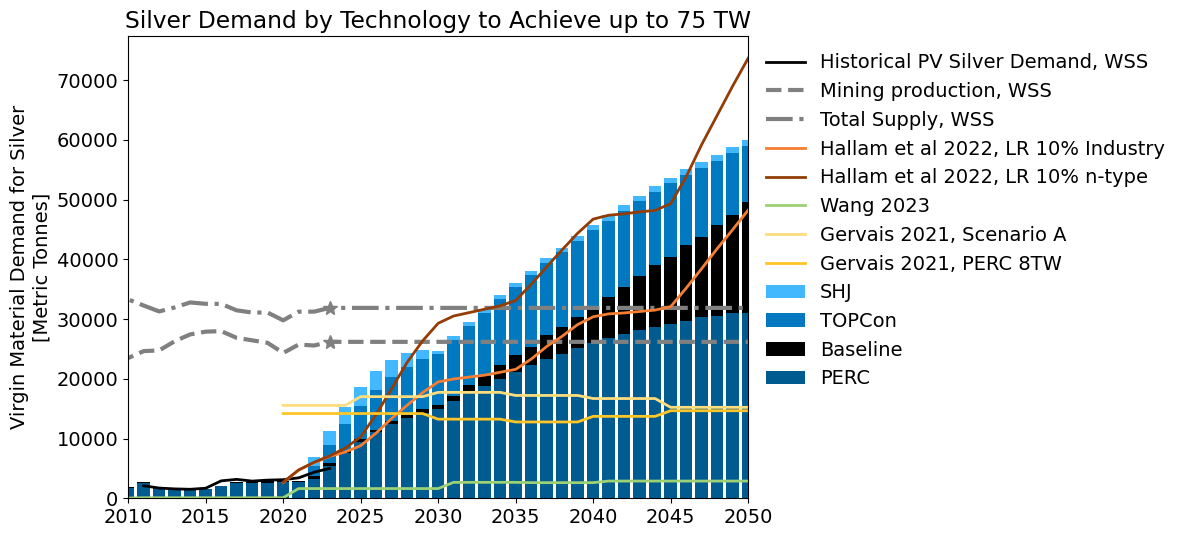

In [22]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='#41B8FF', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='#0079C1', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='#005B91', label='PERC')

plt.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'], lw=2, color='black', label='Historical PV Silver Demand, WSS')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'],
         lw=3, ls='--', color='gray', label='Mining production, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'],
         lw=3, ls=':', color='gray', label='Total Supply, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Industry [tonnes], 63.4TW'],
         lw=2, color='#F77D31', label='Hallam et al 2022, LR 10% Industry')
plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Ntype [tonnes], 63.4TW'],
         lw=2, color='#933C06', label='Hallam et al 2022, LR 10% n-type')

plt.plot(wang2023_Agdemand_allMC[0], color='#9CD174', lw=2, label='Wang 2023, TW')

plt.plot(ag_lit_compare_ffill['Gervais 2021_ScenarioA [tonnes]'],lw=2, color='#FFDC7C', label='Gervais 2021, Scenario A ')
plt.plot(ag_lit_compare_ffill['Gervais 2021_IEA8TW_PERCmoderate [tonnes]'],lw=2, color='#FFC425', label='Gervais 2021, PERC 8TW')
#plt.plot(ag_lit_compare_ffill['Gervais 2021_70TW_PERCmoderate [tonnes]'], color='#DBA000', label='Gervais 2021, PERC 70TW')

#plt.grid(axis='y', color='0.9', ls='--', zorder=0)
#plt.set_axisbelow(True)
plt.legend(frameon=False,bbox_to_anchor=(1,.2))
plt.ylim(0,)
plt.xlim(2010,2050)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve up to 75 TW')

C:\Users\hmirletz\AppData\Local\Temp\1\ipykernel_24936\2485729143.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])


Text(0.5, 1.0, 'Silver Demand by Technology to Achieve up to 75 TW')

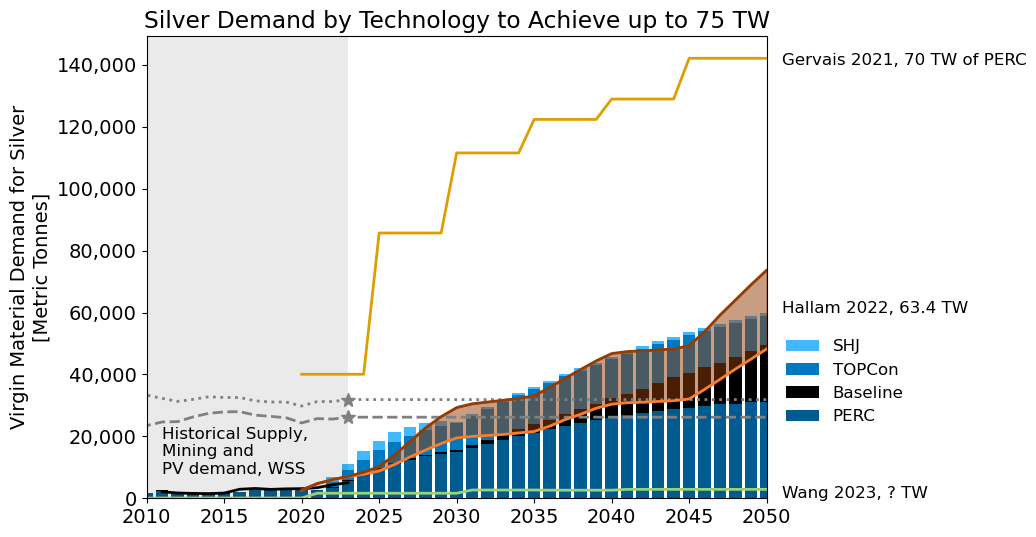

In [108]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)

fig, ax = plt.subplots()

ax.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='#41B8FF', label='SHJ')
ax.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='#0079C1', label='TOPCon')
ax.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
ax.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='#005B91', label='PERC')

ax.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'],lw=2, color='black')#, label='Historical PV Silver Demand, WSS')
ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'],
         lw=2, ls='--', color='gray')#, label='Mining production, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')
ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'],
         lw=2, ls=':', color='gray')#, label='Total Supply, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

ax.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Industry [tonnes]'], lw=2, color='#F77D31')
ax.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Ntype [tonnes]'], lw=2, color='#933C06')
ax.fill_between(ag_lit_compare_ffill.index, ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Industry [tonnes]'],
                ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Ntype [tonnes]'],
                alpha=.5, color='#933C06' )

#ax.plot(ag_lit_compare_ffill['Gervais 2021_ScenarioA [tonnes]'],lw=2, color='#FFDC7C', label='Gervais 2021, Scenario A ')
#ax.plot(ag_lit_compare_ffill['Gervais 2021_IEA8TW_PERCmoderate [tonnes]']*(75/8),lw=2, color='#FFC425', label='Gervais 2021, PERC 8TW to 75TW')
ax.plot(ag_lit_compare_ffill['Gervais 2021_70TW_PERCmoderate [tonnes]'],lw=2, color='#DBA000')

ax.plot(wang2023_Agdemand_allMC[0], color='#9CD174', lw=2)

ax.axvspan(2009,2023, facecolor='0.2', alpha=0.1) #grey shading
ax.text(2051,1,'Wang 2023, ? TW', fontsize=12)
ax.text(2051,60000,'Hallam 2022, 63.4 TW', fontsize=12)
ax.text(2051,140000,'Gervais 2021, 70 TW of PERC', fontsize=12)
ax.text(2011,8000,'Historical Supply,\nMining and\nPV demand, WSS', fontsize=12)

ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])

fig.legend(frameon=False,fontsize=12, bbox_to_anchor=(1.09,0.4)) #(x,y)
ax.set_ylim(0,)
ax.set_xlim(2010,2050)
ax.set_ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve up to 75 TW')


Text(0.5, 1.0, 'Silver Demand by Technology to Achieve up to 75 TW')

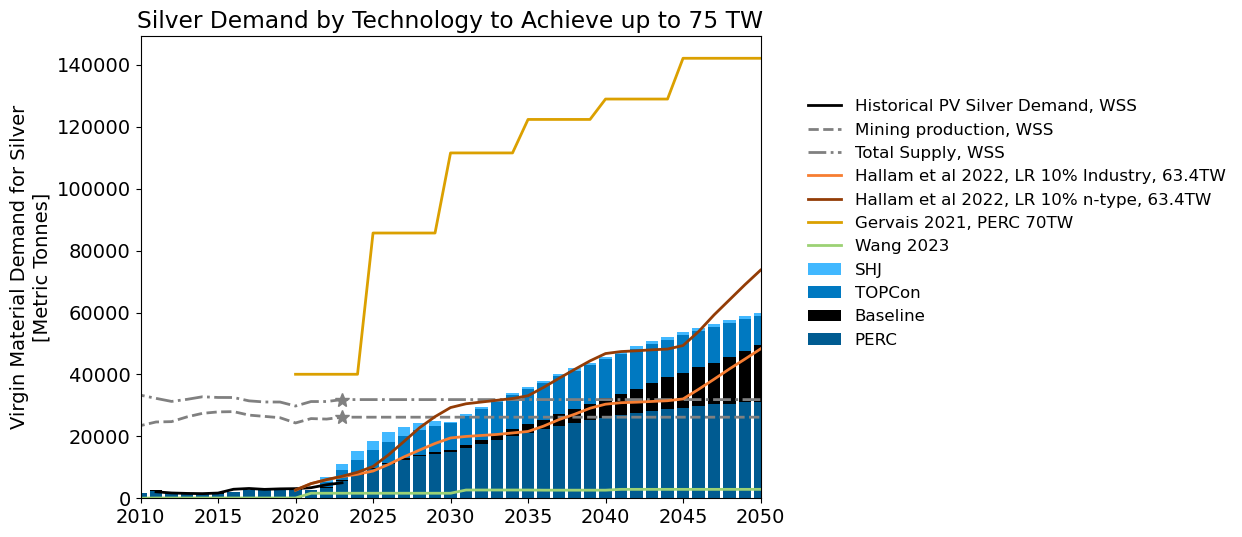

In [45]:
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (8, 6)


fig, ax = plt.subplots()

ax.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='#41B8FF', label='SHJ')
ax.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='#0079C1', label='TOPCon')
ax.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
ax.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='#005B91', label='PERC')

ax.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'],lw=2, color='black', label='Historical PV Silver Demand, WSS')
ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'],
         lw=2, ls='--', color='gray', label='Mining production, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')
ax.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'],
         lw=2, ls='-.', color='gray', label='Total Supply, WSS')
ax.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

ax.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Industry [tonnes]'],
         lw=2, color='#F77D31', label='Hallam et al 2022, LR 10% Industry, 63.4TW')
ax.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Ntype [tonnes]'],
         lw=2, color='#933C06', label='Hallam et al 2022, LR 10% n-type, 63.4TW')

#ax.plot(ag_lit_compare_ffill['Gervais 2021_ScenarioA [tonnes]'],lw=2, color='#FFDC7C', label='Gervais 2021, Scenario A ')
#ax.plot(ag_lit_compare_ffill['Gervais 2021_IEA8TW_PERCmoderate [tonnes]']*(75/8),lw=2, color='#FFC425', label='Gervais 2021, PERC 8TW to 75TW')
ax.plot(ag_lit_compare_ffill['Gervais 2021_70TW_PERCmoderate [tonnes]'],lw=2, color='#DBA000', label='Gervais 2021, PERC 70TW')


ax.plot(wang2023_Agdemand_allMC[0], color='#9CD174', lw=2, label='Wang 2023')

#plt.grid(axis='y', color='0.9', ls='--', zorder=0)
#plt.set_axisbelow(True)
fig.legend(frameon=False,fontsize=12, bbox_to_anchor=(1.5,.8)) #(x,y)
ax.set_ylim(0,)
ax.set_xlim(2010,2050)
ax.set_ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve up to 75 TW')


Text(0.5, 1.0, 'Silver Demand by Technology to Achieve up to 75 TW')

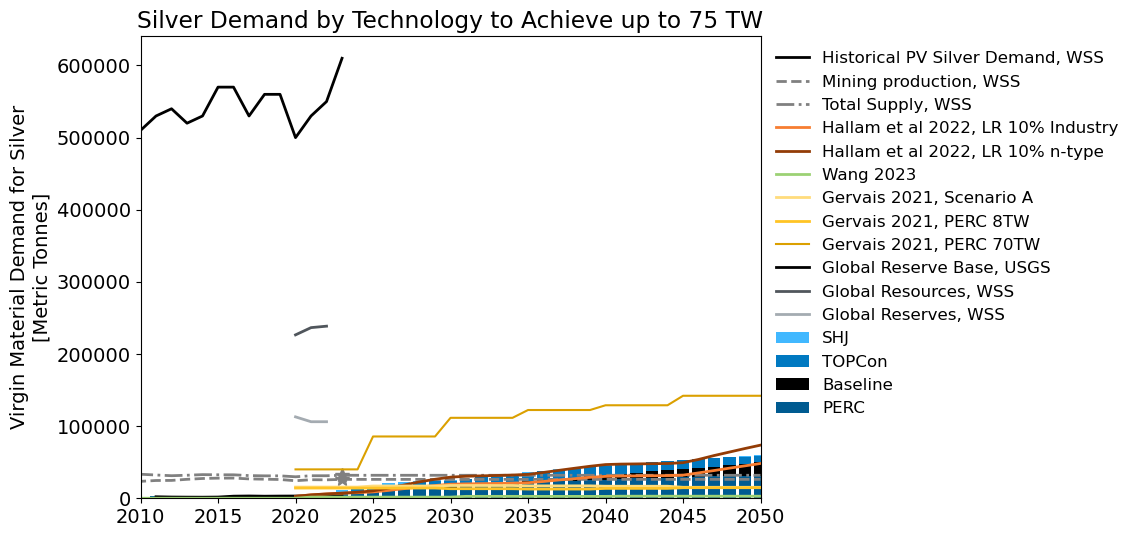

In [24]:
plt.bar(silver_annual_demand_shj.index, silver_annual_demand_shj.iloc[:2051,0], color='#41B8FF', label='SHJ')
plt.bar(silver_annual_demand_topcon.index, silver_annual_demand_topcon.iloc[:2051,0], color='#0079C1', label='TOPCon')
plt.bar(silver_annual_demand_pvice.index, silver_annual_demand_pvice.iloc[:2051,0], color='black', label='Baseline')
plt.bar(silver_annual_demand_perc.index, silver_annual_demand_perc.iloc[:2051,0], color='#005B91', label='PERC')

plt.plot(ag_WSS.index, ag_WSS['PV Silver Demand [metric tonnes]'],lw=2, color='black', label='Historical PV Silver Demand, WSS')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Silver Production [metric tonnes]'],
         lw=2, ls='--', color='gray', label='Mining production, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Silver Production [metric tonnes]'], '*', markersize=10, color='grey')
plt.plot(ag_WSS_flatforward.index, ag_WSS_flatforward['Total Supply [metric tonnes]'],
         lw=2, ls='-.', color='gray', label='Total Supply, WSS')
plt.plot(2023, ag_WSS.loc[2023,'Total Supply [metric tonnes]'], '*', markersize=10, color='grey')

plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Industry [tonnes]'],
         lw=2, color='#F77D31', label='Hallam et al 2022, LR 10% Industry')
plt.plot(ag_lit_compare_ffill['Hallam 2022_LearningRate10%_Ntype [tonnes]'],
         lw=2, color='#933C06', label='Hallam et al 2022, LR 10% n-type')

plt.plot(wang2023_Agdemand_allMC[0], color='#9CD174', lw=2, label='Wang 2023, 63.4TW')


plt.plot(ag_lit_compare_ffill['Gervais 2021_ScenarioA [tonnes]'],lw=2, color='#FFDC7C', label='Gervais 2021, Scenario A ')
plt.plot(ag_lit_compare_ffill['Gervais 2021_IEA8TW_PERCmoderate [tonnes]'],lw=2, color='#FFC425', label='Gervais 2021, PERC 8TW')
plt.plot(ag_lit_compare_ffill['Gervais 2021_70TW_PERCmoderate [tonnes]'], color='#DBA000', label='Gervais 2021, PERC 70TW')

plt.plot(ag_WSS.index, ag_WSS['Global ReserveBase_USGS [tonnes]'],lw=2, color='black', label='Global Reserve Base, USGS')
plt.plot(ag_WSS.index, ag_WSS['Global Resources excluding reserves [metric tonnes]'],lw=2, color='#50565C', label='Global Resources, WSS')
plt.plot(ag_WSS.index, ag_WSS['Global Reserves (exclude production) [ metric tonnes]'],lw=2, color='#A4ABB1', label='Global Reserves, WSS')

#plt.grid(axis='y', color='0.9', ls='--', zorder=0)
#plt.set_axisbelow(True)
plt.legend(frameon=False,fontsize=12, bbox_to_anchor=(1,1)) #(x,y)
plt.ylim(0,)
plt.xlim(2010,2050)
plt.ylabel('Virgin Material Demand for Silver\n[Metric Tonnes]')
plt.title('Silver Demand by Technology to Achieve up to 75 TW')

In [25]:
silver_annual_demand_pvice.loc[2011:2023]

,VirginStock_silver_sim1_PV_ICE_[Tonnes]
year,
2011,2665.438483
2012,1961.618263
2013,1602.453024
2014,1596.559157
2015,1610.159598
2016,2138.537141
2017,2770.650238
2018,2776.282272
2019,2814.759697


### Energy Compare of these techs